In [1]:
from selenium import webdriver
from bs4 import BeautifulSoup
import pandas as pd
import time

url='https://www.cupoy.com/newsfeed/topicgrp/tech_tw'
newscount=int(input('How many news you want to get?')) # aware of the data type(str/int)

browser=webdriver.Chrome(executable_path='../chromedriver')
browser.get(url)
time.sleep(5) # critical code! if it's set too short,may scroll down before the website completely displaies,and fail to get some previous information   

totalnews=[]
while True:
    html_source=browser.page_source #.page_source :to get page source   
    soup=BeautifulSoup(html_source,'lxml') # to parse,'lxml' is faster than 'html5lib', priority use
    
    tags=soup.find_all('div',class_='sc-eEieub sc-iuDHTM ibJqYc')
    
    for tag in tags:
        # initial every news info
        newsinfo={} 
        totalnews.append(newsinfo)

        websiteurl=tag.a['href'] # get website url

        if websiteurl in totalnews: # ignore the repeated news info
            continue
        
        # get the remaining news info 
        titletag=tag.find('div',class_='sc-lnmtFM sc-dznXNo gsZaZX').find('h6',class_='sc-erNlkL sc-ekulBa hDLssh')
        typetag=tag.find('div',class_='sc-lnmtFM sc-dznXNo gsZaZX').find('div',class_='sc-gacfCG bPSpUf')
        contenttag=tag.find('p',class_='sc-FQuPU sc-ciodno bvnzOw')

        # append news info to newsinfo{}
        newsinfo.setdefault('title',titletag.string)
        newsinfo.setdefault('type',typetag.string)
        newsinfo.setdefault('content',contenttag.string)
        newsinfo.setdefault('url',websiteurl)
    
        totalnews=totalnews # refresh variable 

        if len(totalnews)==newscount: # if reach the amount, no need to run more
            print('Stop loading')
            break
    
    if len(totalnews)==newscount: # if reach the amount, no need to run more
        break
        
    else: # loading more news
        time.sleep(2)
        browser.execute_script("window.scrollTo(0,document.body.scrollHeight);") #try to scroll the whole web body height(down to the web bottom)
        print('News loading...')

    
browser.quit()
print(totalnews)


How many news you want to get?500
News loading...
News loading...
News loading...
News loading...
News loading...
News loading...
News loading...
News loading...
News loading...
News loading...
News loading...
News loading...
News loading...
News loading...
News loading...
News loading...
News loading...
News loading...
News loading...
News loading...
News loading...
News loading...
News loading...
News loading...
News loading...
News loading...
News loading...
News loading...
News loading...
News loading...
News loading...
News loading...
News loading...
News loading...
News loading...
News loading...
News loading...
News loading...
News loading...
News loading...
News loading...
News loading...
News loading...
News loading...
News loading...
News loading...
News loading...
News loading...
News loading...
News loading...
News loading...
News loading...
News loading...
News loading...
News loading...
News loading...
News loading...
Stop loading
[{'title': '臺灣區塊鏈新創庫幣科B輪募資獲投5億元，SBI集團二度注資

In [2]:
newstable=pd.DataFrame(totalnews)
newstable

,title,type,content,url
0,臺灣區塊鏈新創庫幣科B輪募資獲投5億元，SBI集團二度注資、國發基金也加入！｜數位時代,區塊鏈技術,庫幣科技宣佈獲得5億臺幣的B輪資金，除了SBI集團二度注資之外，臺灣國發會也在投資人行列中。,https://www.bnext.com.tw/article/56687/coolbit...
1,除了 iPhone SE 2，零售商曝光蘋果可能還有這四項新品發布，包括 AirPods X...,3C產品,AirPods X 也太讓人好奇了吧！,https://agirls.aotter.net/post/56902?utm_sourc...
2,PChome Thai幫跨境電商接地氣！低調上線Ppay，幫賣家處理金流問題｜數位時代,電子商務,泰國這個崛起中的市場，不只有傳統大型電商，其實在社羣網站上的購物更是蓬勃，該如何協助業者一網...,https://www.bnext.com.tw/article/56660/pchome-...
3,測溫儀真假±0.5℃:大疆用棉花棒搞掂？脫離環境談精度就是耍流氓 | 機器之心,無人駕駛,一面是測溫需求爆發，另一面是產能供不應求，於是各類 AI 測溫方案魚龍涌現。 在扎堆的精度宣...,https://www.jiqizhixin.com/articles/2020-02-24-9
4,智能質檢升級換代：爲什麼“關鍵詞”不夠用了？ | 機器之心,AI與大數據,“語義點+機器學習”方案，在實際使用中爲很多質檢項帶來 2~10 倍的效果提升。,https://www.jiqizhixin.com/articles/2020-02-24-7
...,...,...,...,...
495,LG 發表品牌對 AI 的終極想像是……像個科學家？ - SayDigi | 點子生活,AI與大數據,10 小時前，LG 在洛杉磯舉辦的 CES 2020 上舉辦一場發表會。約莫 1 個小時的時...,https://www.saydigi.com/2020/01/470680.html
496,LG 發表品牌對 AI 的終極想像是......像個科學家？ - Saydigi-Tech ...,AI與大數據,LG 與加拿大人工智慧公司 Element AI 將人工智慧分為 4 個階段，離我們最遠的第...,https://saydigi-tech.com/2020/01/17319.html
497,CES 2020：LG劃分居家人工智慧應用為4個等級 以家庭為中心向外擴展更多應用 (150...,AI與大數據,Mash Yang發佈CES 2020：LG劃分居家人工智慧應用為4個等級 以家庭為中心向外...,https://www.cool3c.com/article/150965
498,從2019 AI頂會最佳論文，看深度學習的理論基礎 | 機器之心,AI與大數據,本文將從 2019 年人工智能頂會的獲獎論文出發，爲你介紹深度學習的理論基礎到底是什麼樣的，...,https://www.jiqizhixin.com/articles/2020-01-27-3


In [3]:
groupstatistics=newstable.groupby('type').size()
print(pd.DataFrame(groupstatistics))

               0
type            
3C產品          40
AI與大數據       189
APP應用程式       54
Fintech金融科技    1
Google專區      30
共享經濟           1
創業            12
區塊鏈技術         30
手機平板          16
旅遊             2
汽車             3
無人駕駛           8
物聯網            2
理財             5
相機             2
社交媒體           7
籃球             1
美妝保養           1
美食             2
職涯            11
育兒             2
蘋果專區          14
虛擬實境           1
財經             5
資訊安全          14
趨勢與策略         11
足球             1
遊戲情報          18
醫療健康           4
電子商務          13


C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  


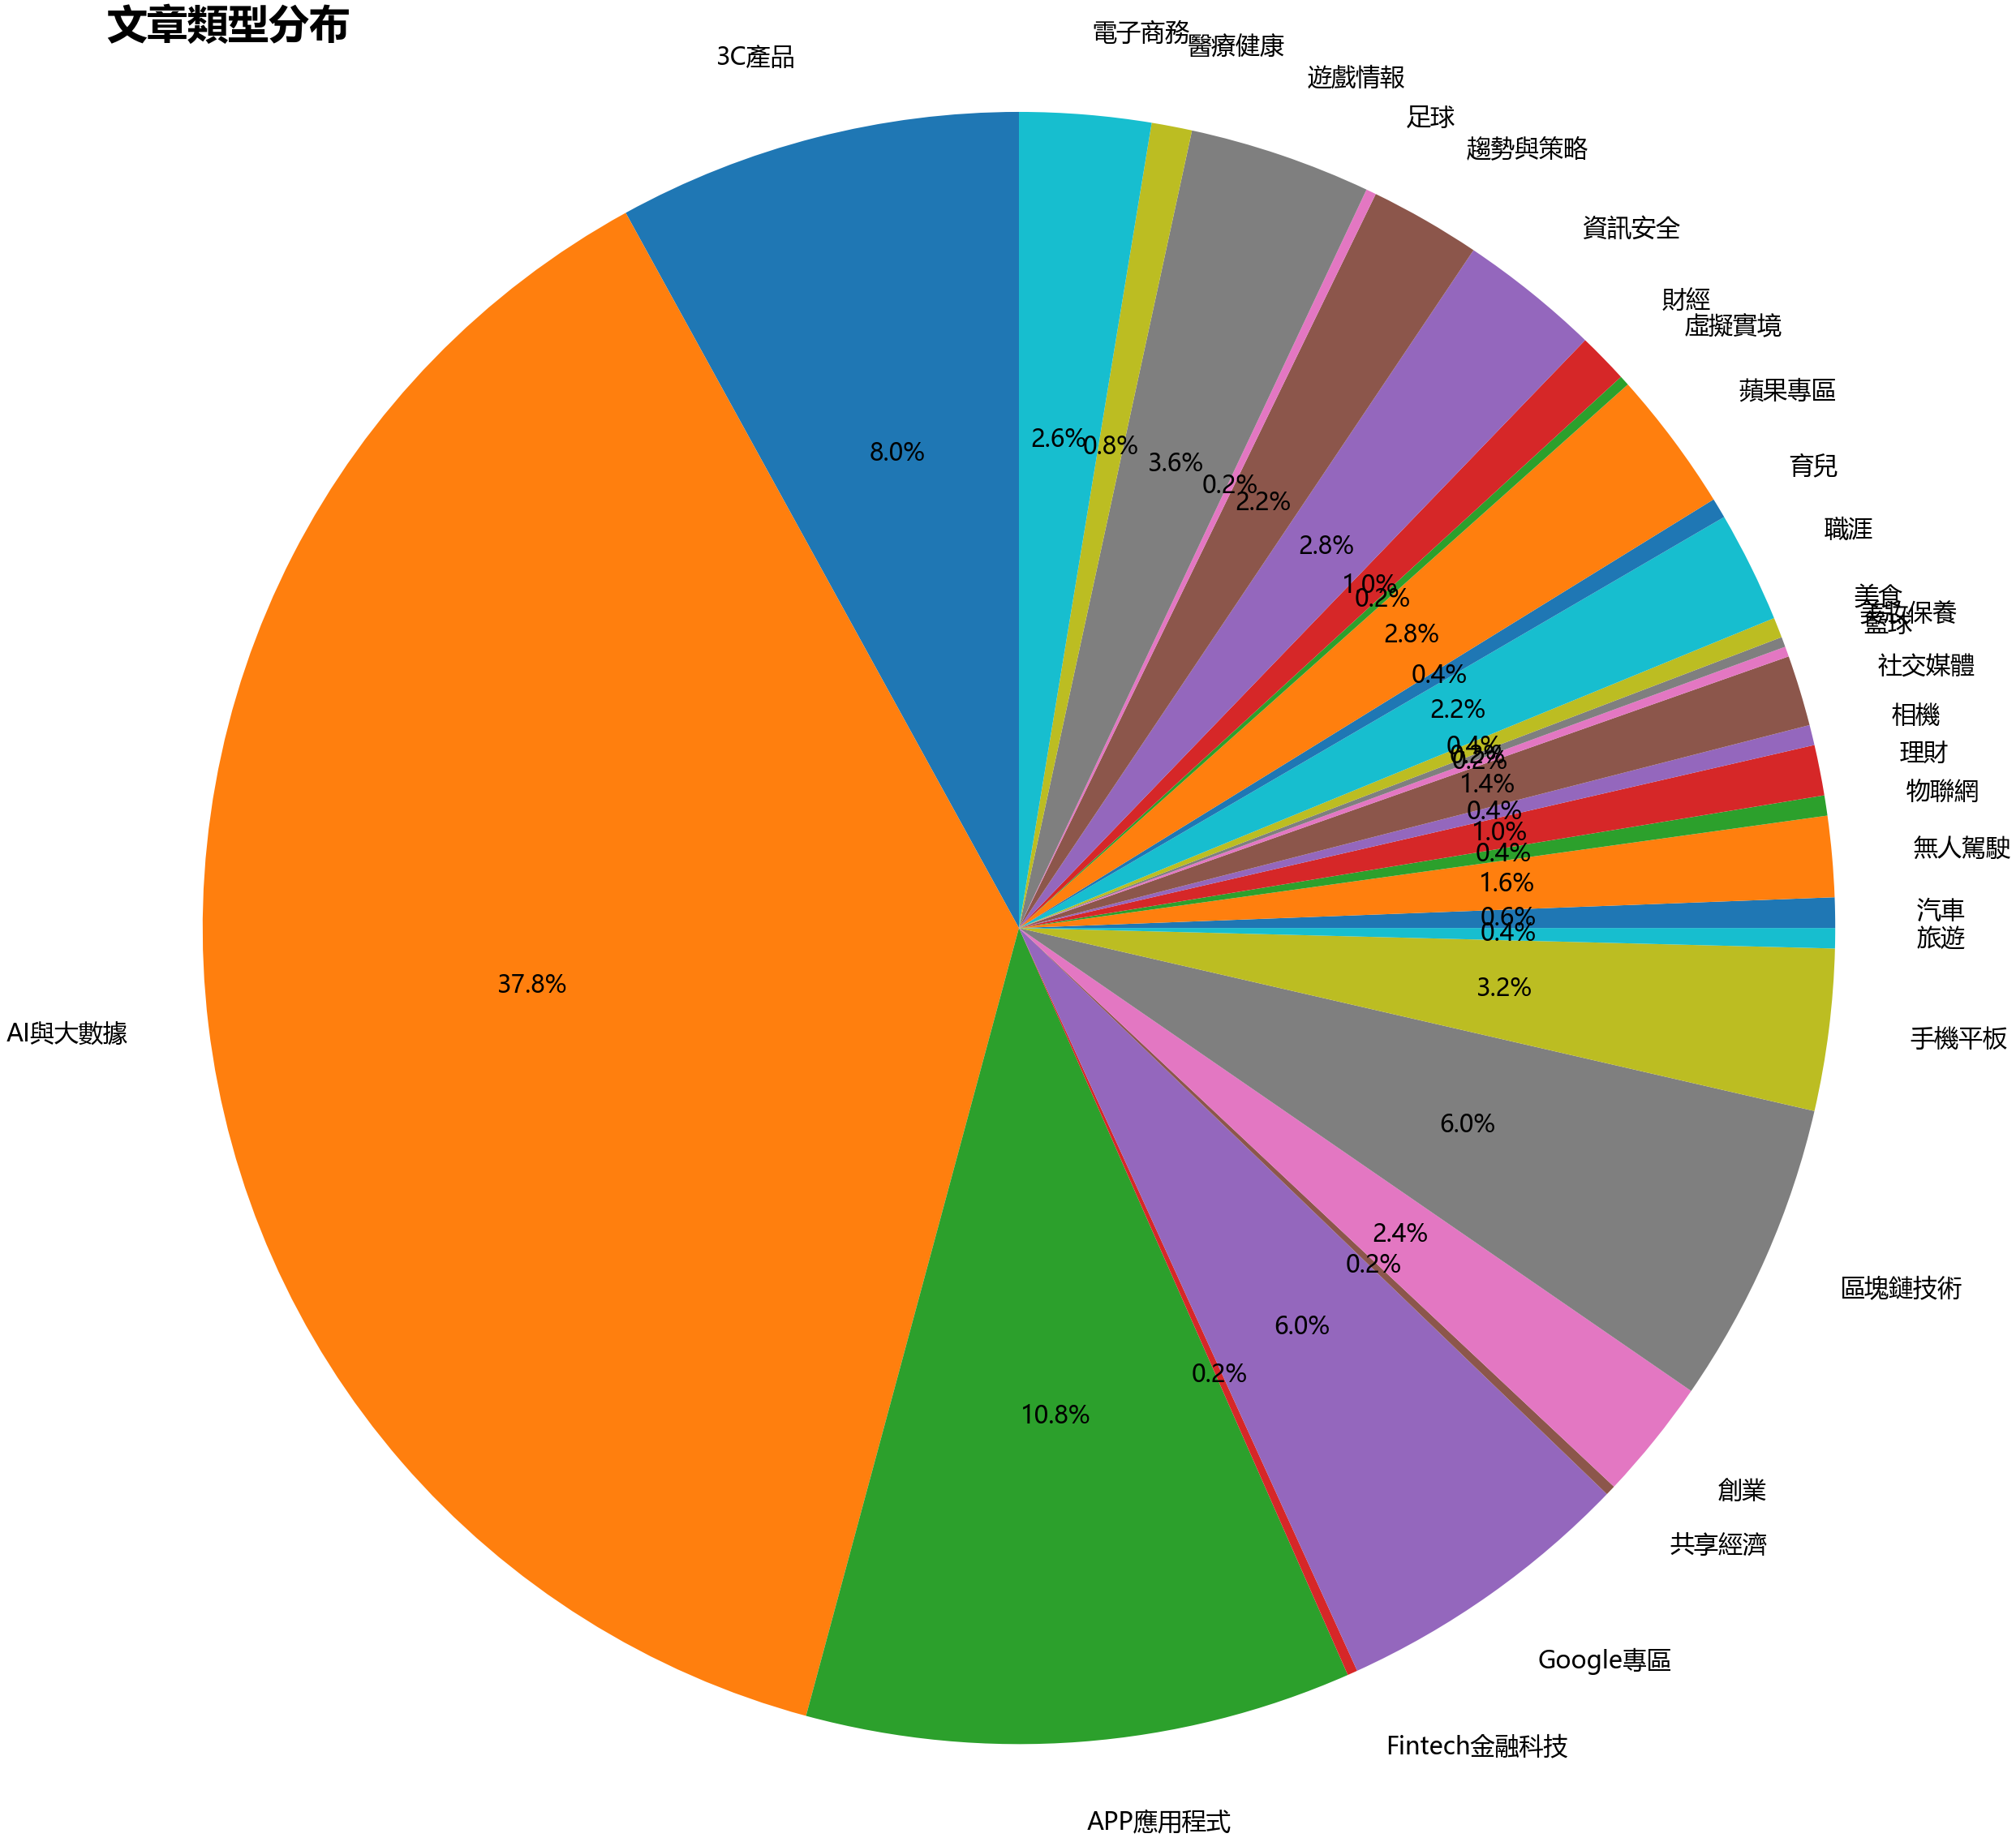

In [5]:
import matplotlib.pyplot as plt
plt.figure(figsize=(40,40))
plt.rcParams['font.sans-serif'] = 'Microsoft YaHei'
#plt.rcParams['axes.unicode_minus'] = False

sortdata=pd.DataFrame(groupstatistics)
labels=sortdata.index
#labels=[i for i in range(1,22)]
#labels=['3C產品','AI與大數據','APP應用程式','Fintech金融科技','Google專區','創業','區塊鏈技術','手機平板','無人駕駛','物聯網','理財','相機','社交媒體','美妝保養','職涯','蘋果專區','資訊安全','趨勢與策略','遊戲情報','醫療健康','電子商務']
plt.pie(sortdata,
        labels=labels,
        autopct='%1.1f%%',
        textprops={'fontsize':30},
        startangle=90
       #shadow=True,加上陰影) # autopct顯示百分比:1.1
       )

plt.axis('equal')
plt.title('文章類型分布',{'fontsize':50},loc='left',fontweight='bold')


plt.show()
